In [25]:
from tensorflow import keras
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import os
from PIL import Image

In [26]:



# def process_tif(path, label):
#     img = Image.open(path.numpy()).convert('RGB')
#     img = img.resize((256, 256))   # Resize image
#     # img =  tf.cast(img, tf.float32) / 255.
#     img = tf.convert_to_tensor(img, dtype=tf.float32)  # Convert to tensor
#     img = img / 255.0  # Normalize to [0, 1]
   
#     return img, label


dataset_path = "/Users/khevinjugessur/Documents/ENEL525/Project/pngImages"
image_paths = []
labels = []
class_names = sorted(os.listdir(dataset_path))  

# count = 3
for class_id, class_name in enumerate(class_names):
    # if count == 0: break
    # count -= 1
    class_folder = os.path.join(dataset_path, class_name)
    counter = 50
    for filename in os.listdir(class_folder):
        if counter == 0 : break
        counter -= 1
        image_paths.append(os.path.join(class_folder, filename))
        labels.append(class_id)



# def preprocess(path, label):
#     img, label = tf.py_function(func=process_tif, inp=[path, label], Tout=(tf.float32, tf.int32))
#     img.set_shape((256, 256, 3)) 
#     label.set_shape([])
#     return img, label

    

In [27]:

from sklearn.model_selection import train_test_split


def preprocess(path, label):
    # Decode and resize image
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)  # Decode PNG images (use tf.image.decode_png instead of decode_image)
    img = tf.image.resize(img, [256, 256])       # Resize to target size
    img = img / 255.0                            # Normalize to [0, 1]
    return img, label



train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.3, stratify=labels, random_state=42
)

# Second split: validation (15%) and test (15%) from the temp set
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)
# Note: test_size=0.5 here splits the remaining 30% equally into 15% for val and 15% for test.

# Print dataset sizes
print(f"Train dataset size: {len(train_paths)}")
print(f"Validation dataset size: {len(val_paths)}")
print(f"Test dataset size: {len(test_paths)}")

# Convert to tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2)
# ])

# Data Augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])


# Preprocessing
train_ds = train_ds.map(preprocess).map(lambda x, y: (data_augmentation(x), y)).batch(32).cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32).cache().prefetch(tf.data.AUTOTUNE)

Train dataset size: 735
Validation dataset size: 157
Test dataset size: 158


In [28]:

def display_image(image, label):
    plt.imshow(image.numpy())  
    plt.title(f"Label: {class_names[label.numpy()]}") 
    plt.axis('off')  
    plt.show()
    
print(len(train_ds))

# for image,label in val_ds.take(1):
#     for i in range(5):
#         display_image(image[i], label[i])





23


In [29]:



# import tensorflow as tf
# from tensorflow.keras import layers, models

# def CNN(input_shape=(256, 256, 3), num_classes=21):
#     inputs = tf.keras.Input(shape=input_shape)
    

#     # Block 1
#     x = layers.Conv2D(8, kernel_size=(7, 7), strides=3, padding='valid')(inputs)  
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')(x) 

#     # Block 2
#     x = layers.Conv2D( 16, kernel_size=(3, 3), strides=1, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
    
#     # Block 3
#     x = layers.Conv2D( 32, kernel_size=(3, 3), strides=1, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
    

   
#     # Block 4
#     x = layers.Conv2D( 64, kernel_size=(3, 3), strides=1, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')(x) 
    


  
#     # Block 5
#     x = layers.Conv2D( 128, kernel_size=(3, 3), strides=2, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # Flatten
#     x = layers.Flatten()(x)  # 61504 features

#     x = layers.Dense(64)(x)  
    
#     x = layers.Dense(21)(x) 
#     # Fully Connected Layer


#     # Softmax Activation
#     x = layers.Softmax(axis=-1)(x)  
#     outputs = layers.BatchNormalization()(x)

#     # Create model
#     model = models.Model(inputs, outputs, name="CNN")
#     return model

# # Create the model
# model = CNN()
# # from sklearn.utils.class_weight import compute_class_weight

# # # # Compute class weights
# # class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
# # class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


# # Compile the model

# model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

# history = model.fit(
#     train_ds,
#     epochs=20,
#     validation_data= val_ds,
    
# )




# # Display the model architecture
# model.summary()



In [30]:
# from tensorflow.keras import layers, Model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator



# # Input layer

# inputs = layers.Input(shape=(256, 256, 3))
# x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Flatten()(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)  # Dropout to reduce overfitting
# outputs = layers.Dense(len(class_names), activation='softmax')(x)

# # Create the model
# model = Model(inputs, outputs)

# # Compile the model
# model.compile(
#     optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


# # Train the model
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=20,
    
# )

# # Evaluate
# print("Model evaluation on validation set:")
# model.evaluate(val_ds)


In [ ]:
# from tensorflow.keras.layers import BatchNormalization, Dropout
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# # Input layer
# inputnode = tf.keras.Input(shape=(256, 256, 3))

# # Convolutional and pooling layers
# conv0 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputnode)
# conv0 = BatchNormalization()(conv0)
# pool0 = MaxPool2D((2, 2))(conv0)

# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pool0)
# conv1 = BatchNormalization()(conv1)
# pool1 = MaxPool2D((2, 2))(conv1)

# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pool1)
# conv2 = BatchNormalization()(conv2)
# pool2 = MaxPool2D((2, 2))(conv2)

# # Flatten and Dense layers
# flatten = Flatten()(pool2)
# dense1 = Dense(256, activation='relu')(flatten)
# dropout1 = Dropout(0.5)(dense1)
# x = layers.Dense(128, activation='relu')(dropout1)  
# x = Dropout(0.5)(x)  
# x = layers.Dense(64, activation='relu')(dropout1)  
# x = Dropout(0.5)(x)  


# # Output layer
# outputnode = Dense(21, activation='softmax')(dropout1)

# # Model definition
# model = tf.keras.Model(inputs=inputnode, outputs=outputnode)

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96,
#     staircase=True
# )
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# # Optional: Viewing the feature map (how the CNN understands images)
# conv_output = model.get_layer('conv2d_9').output
# conv_model = tf.keras.Model(inputs=model.input, outputs=conv_output)

# # Predict the feature map
# featuremap = conv_model.predict(test_ds)

# # Plot the feature map
# plt.imshow(featuremap[0, :, :, 0])  # Display the first feature map
# plt.show()

# print(featuremap.shape)


In [32]:
import collections

# Initialize a counter for class labels
label_counts = collections.Counter()

# Iterate through val_ds and count the labels
for _, labels in val_ds.unbatch():  # unbatch() to access individual elements
    label_counts[int(labels.numpy())] += 1

sorted_label_counts = dict(sorted(label_counts.items()))

# Print sorted class counts
print("Sorted class counts in val_ds:", sorted_label_counts)


# Iterate through val_ds and count the labels
for _, labels in train_ds.unbatch():  # unbatch() to access individual elements
    label_counts[int(labels.numpy())] += 1

sorted_label_counts = dict(sorted(label_counts.items()))

# Print sorted class counts
print("Sorted class counts in val_ds:", sorted_label_counts)

Sorted class counts in val_ds: {0: 8, 1: 8, 2: 7, 3: 8, 4: 7, 5: 8, 6: 7, 7: 7, 8: 8, 9: 7, 10: 7, 11: 8, 12: 7, 13: 7, 14: 7, 15: 8, 16: 8, 17: 8, 18: 8, 19: 7, 20: 7}
Sorted class counts in val_ds: {0: 43, 1: 43, 2: 42, 3: 43, 4: 42, 5: 43, 6: 42, 7: 42, 8: 43, 9: 42, 10: 42, 11: 43, 12: 42, 13: 42, 14: 42, 15: 43, 16: 43, 17: 43, 18: 43, 19: 42, 20: 42}


In [33]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Model definition
# inputnode = tf.keras.Input(shape=(256, 256, 3))

# conv0 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(inputnode)
# conv0 = BatchNormalization()(conv0)
# pool0 = MaxPool2D((2, 2))(conv0)

# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool0)
# conv1 = BatchNormalization()(conv1)
# pool1 = MaxPool2D((2, 2))(conv1)

# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool1)
# conv2 = BatchNormalization()(conv2)
# pool2 = MaxPool2D((2, 2))(conv2)
# # dropout1 = Dropout(0.4)(pool2)

# flatten = Flatten()(pool2)
# dense1 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten)
# dropout1 = Dropout(0.5)(dense1)

# outputnode = Dense(21, activation='softmax')(dropout1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
# # Input layer
# inputnode = tf.keras.Input(shape=(256, 256, 3))

# # Convolutional Block 1
# conv0 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(inputnode)
# conv0 = BatchNormalization()(conv0)
# pool0 = MaxPool2D((2, 2))(conv0)

# # Convolutional Block 2
# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool0)
# conv1 = BatchNormalization()(conv1)
# pool1 = MaxPool2D((2, 2))(conv1)

# # Convolutional Block 3
# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool1)
# conv2 = BatchNormalization()(conv2)
# pool2 = MaxPool2D((2, 2))(conv2)

# # Convolutional Block 4 (NEW)
# conv3 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool2)
# conv3 = BatchNormalization()(conv3)
# pool3 = MaxPool2D((2, 2))(conv3)

# # Dropout after final pooling layer (optional)
# dropout_conv = Dropout(0.4)(pool3)

# # Flatten layer
# flatten = Flatten()(dropout_conv)

# # Fully Connected Block 1
# dense1 = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten)


# # Fully Connected Block 2 (NEW)
# dense2 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dense1)


# # Fully Connected Block 3 (NEW)
# dense3 = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dense2)
# dropout3 = Dropout(0.5)(dense3)

# # Output layer
# outputnode = Dense(21)(dropout3)

#from tensorflow.keras.applications import ResNet50

# # Load ResNet50
# base_model = ResNet50(weights='/Users/khevinjugessur/Documents/ENEL525/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(256, 256, 3))
# base_model.trainable = False  # Freeze weights

# # Add custom layers
# inputnode = tf.keras.Input(shape=(256, 256, 3))
# x = base_model(inputnode, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# outputnode = tf.keras.layers.Dense(21, activation='softmax')(x)

# model = tf.keras.Model(inputs=inputnode, outputs=outputnode)

# Learning rate schedule and optimizer

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
             loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) # 

# Callbacks
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)

# Training the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[ lr_callback])

# Test performance
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.0461 - loss: 19.2951 - val_accuracy: 0.0510 - val_loss: 3.0394 - learning_rate: 0.0010
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0691 - loss: 2.9882 - val_accuracy: 0.0637 - val_loss: 2.9621 - learning_rate: 0.0010
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1603 - loss: 2.6843 - val_accuracy: 0.1019 - val_loss: 3.0701 - learning_rate: 0.0010
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3999 - loss: 2.0417 - val_accuracy: 0.0955 - val_loss: 3.2625 - learning_rate: 0.0010
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5797 - loss: 1.5840 - val_accuracy: 0.0955 - val_loss: 3.2355 - learning_rate: 0.0010
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7641 - loss: 0.9329 - val_accuracy: 0.1401 - val_loss: 5.2020 - learning_rate: 0.0010
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8874 - loss: 0.5845
Epoch 7: ReduceL

In [34]:
# # Input layer
# inputnode = tf.keras.Input(shape=(256, 256, 3))

# # Convolutional and pooling layers
# conv0 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(inputnode)
# conv0 = BatchNormalization()(conv0)
# pool0 = MaxPool2D((2, 2))(conv0)

# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool0)
# conv1 = BatchNormalization()(conv1)
# pool1 = MaxPool2D((2, 2))(conv1)

# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool1)
# conv2 = BatchNormalization()(conv2)
# pool2 = MaxPool2D((2, 2))(conv2)

# # Flatten and Dense layers
# flatten = Flatten()(pool2)
# dense1 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(flatten)
# dropout1 = Dropout(0.5)(dense1)
# outputnode = Dense(21, activation='softmax')(dropout1)

# # Model definition
# model = tf.keras.Model(inputs=inputnode, outputs=outputnode)

# # Learning rate schedule with ReduceLROnPlateau
# lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss", factor=0.5, patience=3, verbose=1
# )

# # Early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss", patience=5, restore_best_weights=True
# )

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[lr_callback, early_stopping])

# # Optional: Class weights for imbalanced datasets
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# class_weights = compute_class_weight(
#     'balanced', classes=np.unique(train_labels), y=train_labels
# )
# class_weights = dict(enumerate(class_weights))

# history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[lr_callback, early_stopping], class_weight=class_weights)


In [35]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras import layers, Model


# base_model = ResNet50(
#     input_shape=(256, 256, 3),  
#     include_top=False,         
#     weights="/Users/khevinjugessur/Documents/ENEL525/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"       # Load pre-trained ImageNet weights
# )

# # Freeze all layers initially
# for layer in base_model.layers:
#     layer.trainable = False
    


# # Add classification layers

# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x) 
# x = layers.Dense(128, activation='relu')(x)  
# x = layers.Dropout(0.5)(x)                   
# outputs = layers.Dense(21, activation='softmax')(x)  

# model = Model(inputs=base_model.input, outputs=outputs)


# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=10
# )


# # Unfreeze top N layers (e.g., last 20 layers)
# for layer in base_model.layers[-20:]:
#     layer.trainable = True



# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history_fine_tune = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=20
# )


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1000000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    64,000,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 21)             │           693 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,066,689 (732.68 MB)

 Trainable params: 64,022,229 (244.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 128,044,460 (488.45 MB)

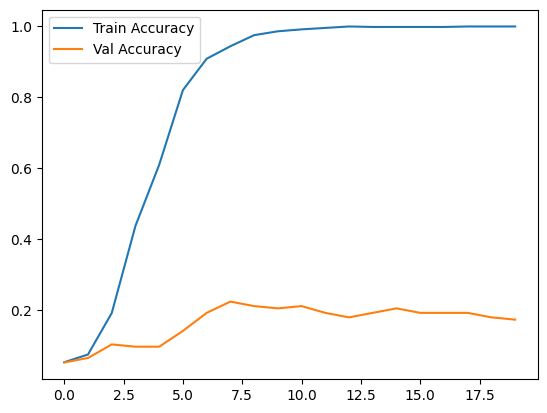

In [36]:
import matplotlib.pyplot as plt
model.summary();
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [37]:

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.1490 - loss: 6.2671
Test Loss: 6.066964626312256
Test Accuracy: 0.16455696523189545


In [38]:
for images, labels in test_ds.take(1):  # Take one batch from the test dataset
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    print("Predicted:", predicted_classes.numpy())
    print("Actual:", labels.numpy())


# featuremap = model.predict(test_ds)

# # Plot the feature map
# plt.imshow(featuremap[ 21, 0])  # Display the first feature map
# plt.show()

# print(featuremap.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Predicted: [ 6  7  0  2  9 13  2  5 12 12  0 15 18  7  7 15 12 15 12 12  7  0 19  3
  7  7 11  0 16 12  9 10]
Actual: [20 14 16  9 17 17 14  0 15 10 16  7 14 14 18 19  7 13  7 19 15  0  8  3
 12 15  5  2  2 14  1 19]


2024-12-17 08:37:07.135268: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [39]:
# y_pred= model.predict(test_ds)
# y_pred = np.argmax(y_pred, axis=1)


# def compute_confusion_matrix(true, pred):
#     k = len(np.unique(true)) #Number of classes
#     result = np.zeros([k, k])
#     for i in range(len(true)):
#         result[true[i]][pred[i]] += 1
#     return result

# # print(y_pred.shape)
# # print(y_pred_t)


# confusion_mx = compute_confusion_matrix(test_labels, y_pred)
# print(confusion_mx)
# diagonal_predictions = np.trace(confusion_mx)
# # print(diagonal_predictions)
# # print(len(y_test))
# Accuracy = ((diagonal_predictions)/len(test_labels))*100
# print("Accuracy:", Accuracy, "%")
history_2 = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=30, 
                    initial_epoch=20,  # Start from epoch 20
                    callbacks=[lr_callback])


Epoch 21/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.1720 - val_loss: 5.9211 - learning_rate: 1.2500e-04
Epoch 22/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.1783 - val_loss: 5.9406 - learning_rate: 1.2500e-04
Epoch 23/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.1783 - val_loss: 5.9609 - learning_rate: 1.2500e-04
Epoch 24/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.1720 - val_loss: 5.9764 - learning_rate: 1.2500e-04
Epoch 25/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.1847 - val_loss: 5.9875 - learning_rate: 1.2500e-04
Epoch 26/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0013
Epoch 26: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss:

In [40]:
history_3 = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=40, 
                    initial_epoch=30,  # Start from epoch 20
                    callbacks=[lr_callback])


Epoch 31/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.1847 - val_loss: 6.0495 - learning_rate: 6.2500e-05
Epoch 32/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.1847 - val_loss: 6.0565 - learning_rate: 6.2500e-05
Epoch 33/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.1847 - val_loss: 6.0647 - learning_rate: 6.2500e-05
Epoch 34/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.1847 - val_loss: 6.0728 - learning_rate: 6.2500e-05
Epoch 35/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 1.0000 - loss: 9.9702e-04 - val_accuracy: 0.1847 - val_loss: 6.0781 - learning_rate: 6.2500e-05
Epoch 36/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 9.7559e-04
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 1.000